## Visualizing dynamic of commits per user in project1

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect("../datasets/checking-logs.sqlite")

#### Creating a DataFrame

In [3]:
sql = """
SELECT uid, timestamp as date, COUNT(*) AS commits
FROM checker
WHERE labname == 'project1' AND status == 'ready' AND uid LIKE 'user_%'
GROUP BY uid, date
ORDER By date
"""
df = pd.read_sql(sql,con, parse_dates='date')
df['cum_commits'] = df.groupby('uid')['commits'].cumsum()
#print(df)



#### Creating a graph

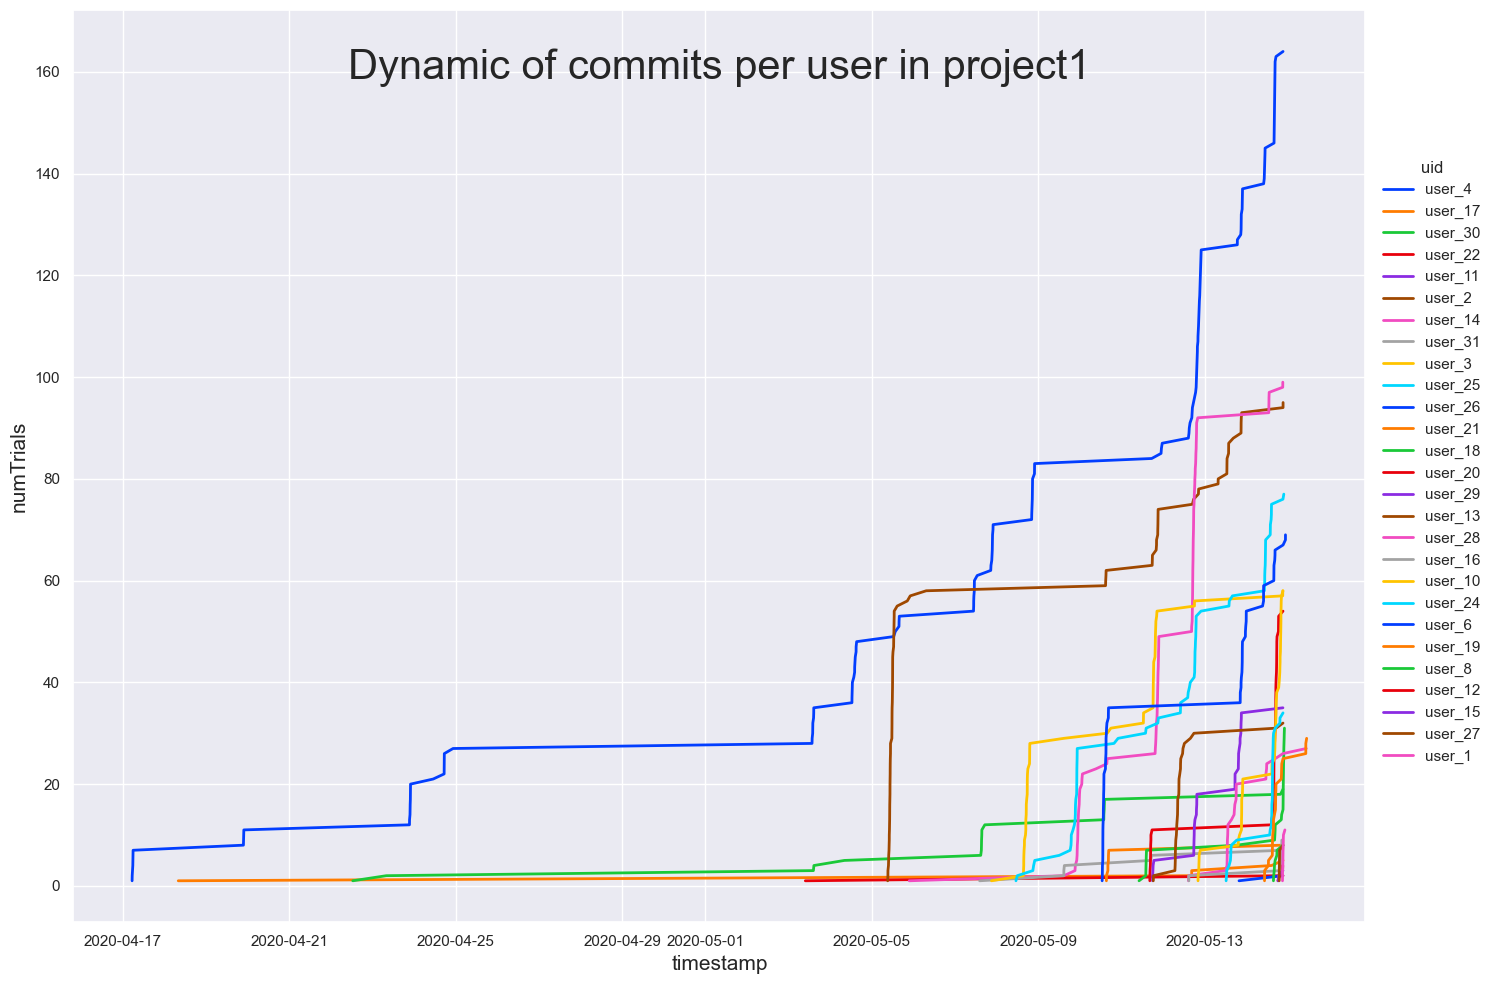

In [4]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
sns.lineplot(
    data=df,
    x='date',
    y='cum_commits',
    hue='uid',
    linewidth=2,
    palette='bright', #flare
)
plt.legend(
    title='uid',
    bbox_to_anchor=(1.1, 0.85),
    facecolor='#f0f0f0',
    frameon=False  
)

plt.rcParams['figure.facecolor'] = '#f0f0f0'  

plt.title('Dynamic of commits per user in project1', fontsize=30, pad=-50)
plt.xlabel('timestamp', fontsize=15)
plt.ylabel('numTrials', fontsize=15)
plt.tight_layout()  

#### Which user was the leader in the number of commits almost all of the time? The answer: user_4.

#### Which user was the leader for only a short period of time?” The answer: user_2.

In [5]:
con.close()